<a href="https://colab.research.google.com/github/SignalDecomposition/Deep_Learning_via_pytorch/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang. \\
***Michael Shifrin *** \\
***Eldar Mamedov  *** 

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
csv_path = '/content/gdrive/My Drive/Deep Learning Homeworks/Assignment1/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Mounted at /content/gdrive


Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [ ]:
df

To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [ ]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [ ]:
df.head(20)

### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [ ]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here
'''
Songs from the same artist will have a high correlation between them through the years taking 
the same artist in the trianing data and use it again in the test, 
we will maybe get a small loss but dos not mean we trained wall our model.
mybe our model learned a specific artist really well but will have trouble with others, so we will 
get a false loss of our model for all artist. In addition, we can identify overfiting more easily.  
'''

'\nSongs from the same artist will have a high correlation between them through the years taking \nthe same artist in the trianing data and use it again in the test, \nwe will maybe get a small loss but dos not mean we trained wall our model.\nmybe our model learned a specific artist really well but will have trouble with others, so we will \nget a false loss of our model for all artist. In addition, we can identify overfiting more easily.  \n'

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [ ]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [ ]:
# Write your explanation here
'''
we have few resones for that: 
1) train data is smaller than the test data than so we will not get the a good mean and standard deviation. 
2) The model is have to based only on training data and because of that we can use the mean and standard deviation of the test data
'''

'\nwe have few resones for that: \n1) train data is smaller than the test data than so we will not get the a good mean and standard deviation. \n2) The model is have to based only on training data and because of that we can use the mean and standard deviation of the test data\n'

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [ ]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here
'''
The success rate of the classification is then evaluated with a set of validation samples {x1, x2, . . . , xn}
whose properties are similar to those of the training set. 
The evaluation of the classification/regression is done by comparing the original labels with the labels associated by the trained model. Usually,
the learning model might still be changed (especially hyper-parameters, like the size or
depth of the machine learning model) during the validation and therefore there is a need
for final testing of the machine learning system on an additional data that is the test data,
where the model can not be changed.
The need to limit the use of test data comes from overfiting again as said in part a'. 
'''

"\nThe success rate of the classification is then evaluated with a set of validation samples {x1, x2, . . . , xn}\nwhose properties are similar to those of the training set. \nThe evaluation of the classification/regression is done by comparing the original labels with the labels associated by the trained model. Usually,\nthe learning model might still be changed (especially hyper-parameters, like the size or\ndepth of the machine learning model) during the validation and therefore there is a need\nfor final testing of the machine learning system on an additional data that is the test data,\nwhere the model can not be changed.\nThe need to limit the use of test data comes from overfiting again as said in part a'. \n"

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  return -t * np.log(y + 1e-7) - (1 - t) * np.log(1 - y + 1e-7)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [ ]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  return sigmoid(np.matmul(X, w) + b)


### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [ ]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  N = len(y)
  dLdw = np.matmul(np.transpose(X), y-t)/N
  dLdb = np.sum(y-t)/N
  return dLdw, dLdb 
  


# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

Write your explanation here. Use Latex to write mathematical expressions. [Here is a brief tutorial on latex for notebooks.](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)




\begin{gathered}
  L = \frac{1}{N}\sum\limits_{n = 1}^N {\left( { - {t_n}\log \left( {{y_n}} \right) - \left( {1 - {t_n}} \right)\log \left( {1 - {y_n}} \right)} \right)}  \hfill \\
  \frac{{\partial L}}{{\partial {\omega _k}}} = \frac{1}{N}\sum\limits_{n = 1}^N {\frac{{\partial L}}{{\partial {y_n}}} \cdot \frac{{\partial {y_n}}}{{\partial {z_n}}} \cdot \frac{{\partial {z_n}}}{{\partial {\omega _k}}}}  \hfill \\
  \frac{{\partial L}}{{\partial {y_n}}} = \frac{{\partial \left( { - {t_n}\log \left( {{y_n}} \right) - \left( {1 - {t_n}} \right)\log \left( {1 - {y_n}} \right)} \right)}}{{\partial {y_n}}} =  - \frac{{{t_n}}}{{{y_n}}} + \frac{{1 - {t_n}}}{{1 - {y_n}}} = \frac{{ - {t_n}\left( {1 - {y_n}} \right) + {y_n}\left( {1 - {t_n}} \right)}}{{{y_n}\left( {1 - {y_n}} \right)}} = \frac{{{y_n} - {t_n}}}{{{y_n}\left( {1 - {y_n}} \right)}} \hfill \\
  \frac{{\partial {y_n}}}{{\partial {z_n}}} = \frac{{\partial \left( {\sigma \left( {{z_n}} \right)} \right)}}{{\partial {z_n}}} = \sigma \left( {{z_n}} \right)\left( {1 - \sigma \left( {{z_n}} \right)} \right) = {y_n}\left( {1 - {y_n}} \right) \hfill \\
  \frac{{\partial {z_n}}}{{\partial {\omega _k}}} = \frac{{\partial \left( {{\omega ^T}X + b} \right)}}{{\partial {\omega _k}}} = {X_{nk}} \hfill \\
  \frac{{\partial L}}{{\partial {\omega _k}}} = \frac{1}{N}\sum\limits_{n = 1}^N {\frac{{\partial L}}{{\partial {y_n}}} \cdot \frac{{\partial {y_n}}}{{\partial {z_n}}} \cdot \frac{{\partial {z_n}}}{{\partial {\omega _k}}}}  = \frac{1}{N}\sum\limits_{n = 1}^N {\frac{{{y_n} - {t_n}}}{{{y_n}\left( {1 - {y_n}} \right)}} \cdot {y_n}\left( {1 - {y_n}} \right) \cdot {X_{nk}}}  = \frac{1}{N}\sum\limits_{n = 1}^N {\left( {{y_n} - {t_n}} \right){X_{nk}}}  = \frac{1}{N}{\left( {\underline y  - \underline t } \right)^T}\underline {{X_k}}  \hfill \\
  \frac{{\partial L}}{{\partial \omega }} = \frac{1}{N}{\left( {\underline y  - \underline t } \right)^T}X \hfill \\ 
\end{gathered}

and in the same way
\begin{gathered}
  \frac{{\partial {z_n}}}{{\partial b}} = \frac{{\partial \left( {{\omega ^T}X + b} \right)}}{{\partial b}} = 1 \hfill \\
  \frac{{\partial L}}{{\partial b}} = \frac{1}{N}\sum\limits_{n = 1}^N {\frac{{\partial L}}{{\partial {y_n}}} \cdot \frac{{\partial {y_n}}}{{\partial {z_n}}} \cdot \frac{{\partial {z_n}}}{{\partial {\omega _k}}}}  = \frac{1}{N}\sum\limits_{n = 1}^N {\frac{{{y_n} - {t_n}}}{{{y_n}\left( {1 - {y_n}} \right)}} \cdot {y_n}\left( {1 - {y_n}} \right) \cdot 1}  = \frac{1}{N}\sum\limits_{n = 1}^N {{y_n} - {t_n}}  \hfill \\ 
\end{gathered}




### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [ ]:
# Your code goes here

X = train_norm_xs[:10]
t = np.squeeze(train_ts[:10])
w = np.random.randn(90)
b = np.random.rand(1)
y = pred(w, b, X)
C = cost(y, t)

r3, r1 = derivative_cost(X, y, t)
h = 10e-5
b_n = b+h
y_n = pred(w, b_n, X)
C_n = cost(y_n, t)
r2 = (C_n-C)/h
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)


The analytical results is - -0.08938058275113589
The algorithm results is -  -0.08905630169753209


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [ ]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code
r4 = np.zeros(len(w))
C_N = np.zeros(len(w))
for i in range(len(w)):
  vec_h = np.zeros(len(w))
  vec_h[i] = h
  y_n = pred(w + vec_h, b, X)
  C_N[i] = cost(y_n, t)
  r4[i] = (C_N[i]-C)/h
for i in range(len(w)):
  print("The analytical results is w_{} -".format(i),r3[i])
  print("The algorithm results is w_{} -".format(i), r4[i]) 

#print("The analytical results is -", r3)
#print("The algorithm results is - ", r4)

The analytical results is w_0 - 0.23270172797215433
The algorithm results is w_0 - 0.23250727338552934
The analytical results is w_1 - 0.08859232985646488
The algorithm results is w_1 - 0.08853440076617147
The analytical results is w_2 - 0.23225943346771186
The algorithm results is w_2 - 0.2322150430789094
The analytical results is w_3 - -0.2500699121583413
The algorithm results is w_3 - -0.24931986985166077
The analytical results is w_4 - -0.2496140827247272
The algorithm results is w_4 - -0.24916513414741104
The analytical results is w_5 - -0.31410320102149186
The algorithm results is w_5 - -0.31390078017778933
The analytical results is w_6 - -0.007170532573928032
The algorithm results is w_6 - -0.006740225262369393
The analytical results is w_7 - 0.22998745288199968
The algorithm results is w_7 - 0.22976456923284871
The analytical results is w_8 - 0.2770700120292182
The algorithm results is w_8 - 0.27671186978217577
The analytical results is w_9 - 0.3264290144091252
The algorithm re

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [ ]:
def run_gradient_descent(w0, b0, train_norm_xs = train_norm_xs, train_ts = train_ts, val_norm_xs = val_norm_xs, val_ts = val_ts, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0
  val_acc_all = np.array([])
  val_cost_all = []
  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y = pred(w, b, X)
      # update w and b
      dLdw, dLdb = derivative_cost(X, y, t)
      w = w - mu*dLdw
      b = b - mu*dLdb
      # increment the iteration count
      iter += 1
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        y_val = pred(w, b, val_norm_xs)
        val_ts = np.squeeze(val_ts)
        val_cost = cost(y_val, val_ts)
        val_cost_all.append(val_cost)
        val_acc = get_accuracy(y_val, val_ts)
        #print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                #iter, val_acc * 100, val_cost))
        val_acc_all = np.append(val_acc_all, np.array([val_acc]))

      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
      
  return w, b, val_acc_all, val_cost_all



### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

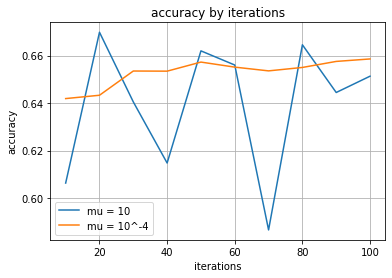

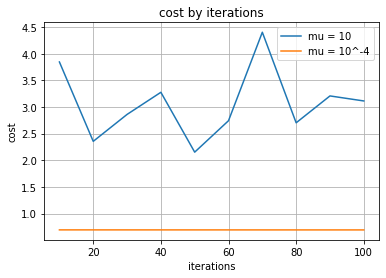

In [ ]:
w0 = np.squeeze(np.zeros(90))
b0 = 0
big_mu = 10
_, _, val_acc_big, val_cost_big = run_gradient_descent(w0, b0, mu = big_mu)
small_mu = 10**-4
_, _, val_acc_small, val_cost_small = run_gradient_descent(w0, b0, mu = small_mu)
iters = 10*(np.array([i for i in range(len(val_acc_big))])+1)
plt.plot(iters, val_acc_big, label = "mu = 10")
plt.plot(iters, val_acc_small, label = "mu = 10^-4")
plt.grid(True)
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.title("accuracy by iterations")
plt.legend()
plt.show()
plt.plot(iters, val_cost_big, label = "mu = 10")
plt.plot(iters, val_cost_small, label = "mu = 10^-4")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost by iterations")
plt.legend()
plt.grid(True)
plt.show()

**Explain and discuss your results here:**


We can see by the cost plot that for small μ the cost function doesn't change, and for big μ the cost function jumps between high values, thus in both cases the cost function doesn't converge.

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

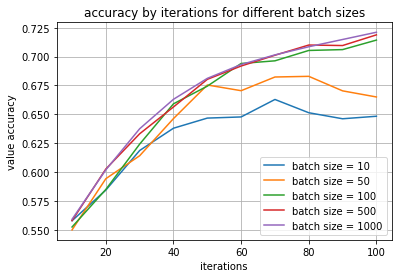

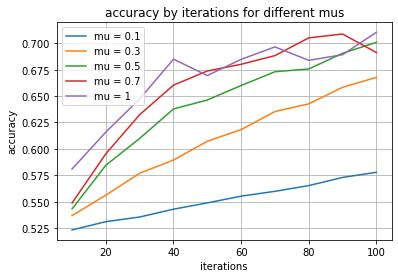

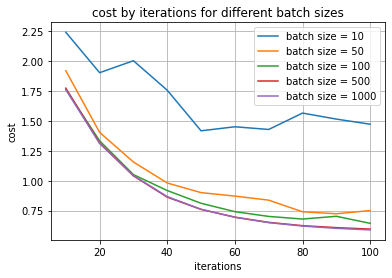

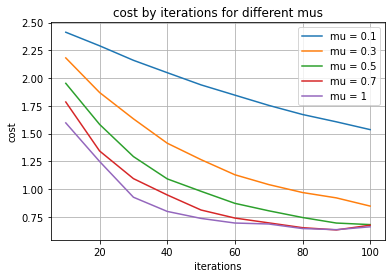

optimal weights are w = [ 1.89751735e+00 -1.24322888e+00 -2.79086545e-01 -7.08112476e-01
 -4.86513190e-02 -4.12922954e-01  2.32005377e-01 -1.26841196e-01
 -2.78574476e-01  9.88612360e-02  2.10424878e-01 -2.24506507e-01
  3.24761781e-01  3.71059494e-01 -1.28846223e-01  3.54619763e-01
  1.53083925e-02  7.47806824e-01  3.38642940e-01 -4.69907846e-01
  7.19310671e-02  1.45122348e-01  3.12125659e-01  5.01204617e-01
 -1.53799275e-01 -1.85789679e-01  1.25764193e-01 -2.42797451e-01
 -2.07283500e-02  4.46689075e-02 -2.94501609e-01  5.82868025e-02
 -4.70856437e-01 -9.39946935e-03 -4.61997637e-01 -1.80069470e-01
  2.82419473e-02  1.28898423e-01  3.49785984e-01  9.47737258e-02
 -9.02664465e-02 -1.08260554e-01  1.68631237e-03 -1.64914293e-01
  2.24000502e-02  3.40611378e-02  1.87568345e-01 -2.57493271e-01
  6.91720413e-02 -2.96070419e-02 -1.26726874e-01  8.28637203e-02
 -2.21937453e-01 -2.01324010e-01 -9.90109732e-02 -2.05230157e-01
 -3.22463960e-01  1.44937692e-01 -7.20174289e-02 -2.31877812e-01
 

In [ ]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

batch_sizes = [10, 50, 100, 500, 1000]
mu = [0.1, 0.3, 0.5, 0.7, 1]
for i in range(5):
  _, _, val_acc, _ = run_gradient_descent(w0, b0, mu = 0.7, batch_size = batch_sizes[i])
  plt.plot(iters, val_acc, label = "batch size = "+str(batch_sizes[i]))
plt.xlabel("iterations")
plt.ylabel("value accuracy")
plt.legend()
plt.title("accuracy by iterations for different batch sizes")
plt.grid(True)
plt.show()
for i in range(5):
  _, _, val_acc, _ = run_gradient_descent(w0, b0, mu = mu[i])
  plt.plot(iters, val_acc, label = "mu = "+str(mu[i]))
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.legend()
plt.title("accuracy by iterations for different mus")
plt.grid(True)
plt.show()
for i in range(5):
  _, _, _, val_cost = run_gradient_descent(w0, b0, mu = 0.7, batch_size = batch_sizes[i])
  plt.plot(iters, val_cost, label = "batch size = "+str(batch_sizes[i]))
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.title("cost by iterations for different batch sizes")
plt.grid(True)
plt.show()
for i in range(5):
  _, _, _, val_cost = run_gradient_descent(w0, b0, mu = mu[i])
  plt.plot(iters, val_cost, label = "mu = "+str(mu[i]))
plt.xlabel("iterations")
plt.ylabel("cost")
plt.legend()
plt.title("cost by iterations for different mus")
plt.grid(True)
plt.show()
w, b, _, _ = run_gradient_descent(w0, b0, mu = 0.75)
print("optimal weights are w = " + str(w))
print("optimal bias is b = " + str(b))

**Explain and discuss your results here:**




We can see by the results that for fixed batch size = 500 we get the best accuracy and best convergence for cost function for μ=0.7 and for the same fixed μ=0.7 we get the best results for batch size = 500, 1000 \\
although batch size = 1000 gives also good results, it costs us in computing time.

### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [ ]:
# Write your code here

y_train = pred(w, b, train_norm_xs)
y_val = pred(w, b, val_norm_xs)
y_test = pred(w, b, test_norm_xs)
train_acc = get_accuracy(y_train, train_ts)
val_acc = get_accuracy(y_val, val_ts)
test_acc = get_accuracy(y_test, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.711956298417993  val_acc =  0.71378  test_acc =  0.7102072438504745


**Explain and discuss your results here:** \\
by the results we can see that the test accuracy is close to the train accuracy and the validation accuracy, although a bit smaller.


### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [ ]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model.fit(train_norm_xs, train_ts)
y_train = model.predict(train_norm_xs)
y_val = model.predict(val_norm_xs)
y_test = model.predict(test_norm_xs)
train_acc = get_accuracy(y_train, train_ts)
val_acc = get_accuracy(y_val, val_ts)
test_acc = get_accuracy(y_test, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_acc =  0.7324051581402656  val_acc =  0.73486  test_acc =  0.7262250629478985


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
